## Explore the gender-age-train dataset

In [1]:
# imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

### Getting data

In [2]:
genderage = pd.read_csv('gender_age_train.csv')

In [3]:
genderage.head(10)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31
5,-1297074871525174196,F,24,F24-26
6,236877999787307864,M,36,M32-38
7,-8098239495777311881,M,38,M32-38
8,176515041953473526,M,33,M32-38
9,1596610250680140042,F,36,F33-42


In [4]:
genderage.shape

(74645, 4)

In [11]:
genderage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


### Age

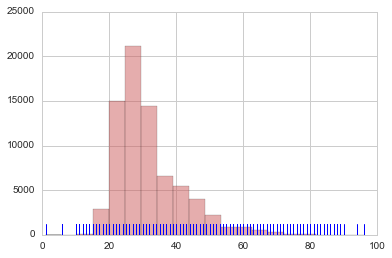

In [5]:
plt.hist(genderage.age, color = 'indianred', alpha = 0.5, bins = 20)
sns.rugplot(genderage.age)

The age distribution is skewed.

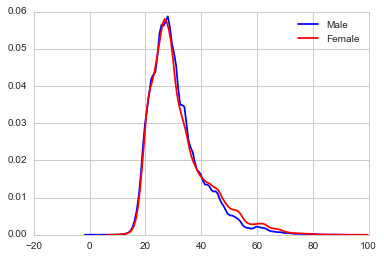

In [9]:
# age by gender
sns.kdeplot(genderage.age[genderage.gender == 'M'], color = 'blue', label = 'Male')
sns.kdeplot(genderage.age[genderage.gender == 'F'], color = 'red', label = 'Female')
plt.legend()

The age distributions for males and females are very similar, except for a slight different between age 40 to 60.

### Gender

In [10]:
print(genderage.gender.value_counts())

M    47904
F    26741
Name: gender, dtype: int64


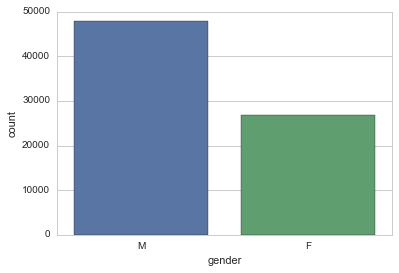

In [14]:
sns.countplot(genderage.gender)

There are almost twice as many men as women in the dataset.

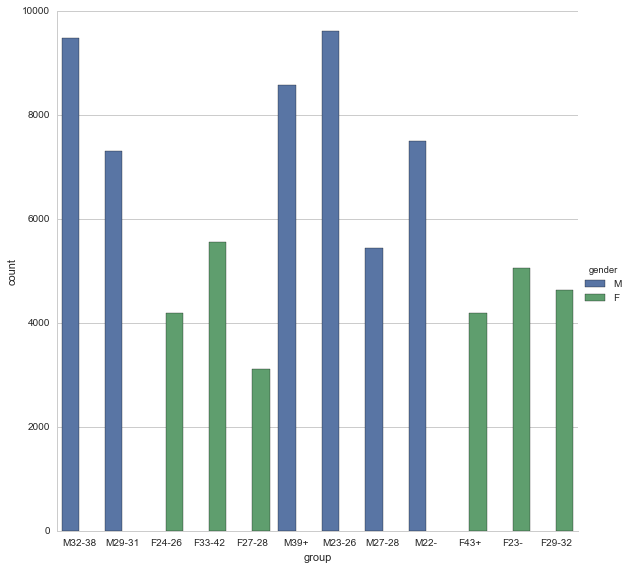

In [26]:
sns.factorplot('group', data = genderage, kind = 'count', hue = 'gender', size = 8.0, aspect = 1)